In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import bz2
import re
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import seaborn as sns

In [2]:
real_news = pd.read_csv('/Users/palas/Downloads/archive-fake-news/True.csv')
real_news['label'] = 1
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [3]:
real_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
fake_news = pd.read_csv('/Users/palas/Downloads/archive-fake-news/Fake.csv')
fake_news['label'] = 0
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [5]:
news = pd.concat([real_news, fake_news], ignore_index = True, sort = False)
news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
news.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [7]:
pd.set_option('max_colwidth', True)
news.head()

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script        
1  U.S. military to accept transgender recruits on Monday: Pentagon        
2  Senior U.S. Republican senator: 'Let Mr. Mueller do his job'            
3  FBI Russia probe helped by Australian diplomat tip-off: NYT             
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [9]:
news['date'] = news['date'].str.replace('Dec ', 'December ')
news['date'] = news['date'].str.replace('Nov ', 'November ')
news['date'] = news['date'].str.replace('Oct ', 'October ')
news['date'] = news['date'].str.replace('Sep ', 'September ')
news['date'] = news['date'].str.replace('Aug ', 'August ')
news['date'] = news['date'].str.replace('Jul ', 'July ')
news['date'] = news['date'].str.replace('Jun ', 'June ')
news['date'] = news['date'].str.replace('Apr ', 'April ')
news['date'] = news['date'].str.replace('Mar ', 'March ')
news['date'] = news['date'].str.replace('Feb ', 'February ')
news['date'] = news['date'].str.replace('Jan ', 'January ')

In [10]:
news['date'] = news['date'].str.replace(' ', '')

In [11]:
news['date'] = pd.to_datetime(news['date'], format='%B%d,%Y', errors = 'coerce')

In [12]:

news['date'] = news['date'].astype('datetime64')
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44853 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [13]:
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month

news.head()

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script        
1  U.S. military to accept transgender recruits on Monday: Pentagon        
2  Senior U.S. Republican senator: 'Let Mr. Mueller do his job'            
3  FBI Russia probe helped by Australian diplomat tip-off: NYT             
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [14]:
yearly_news_fall = news[['date', 'label']]
yearly_news_fall = news.groupby(['date'])['label'].count()
yearly_news_fall = pd.DataFrame(yearly_news_fall)
yearly_news_fall

,label
date,
2015-03-31,8
2015-04-01,2
2015-04-02,1
2015-04-04,5
2015-04-05,13
...,...
2017-12-27,78
2017-12-28,11
2017-12-29,26


Text(0.5, 1.0, 'yearly news timeline')

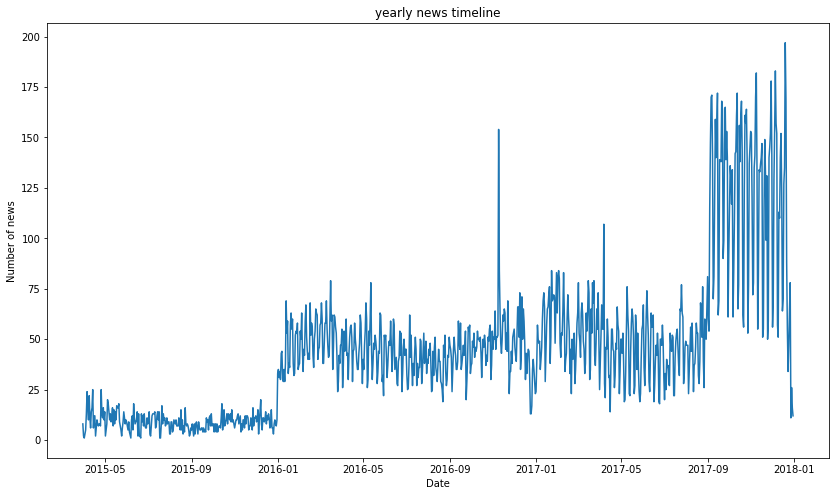

In [15]:

plt.figure(figsize=(14, 8))
plt.ylabel('Number of news')
plt.xlabel('Date')
plt.plot(yearly_news_fall.index, yearly_news_fall.values)
plt.title("yearly news timeline")

0    23481
1    21417
Name: label, dtype: int64


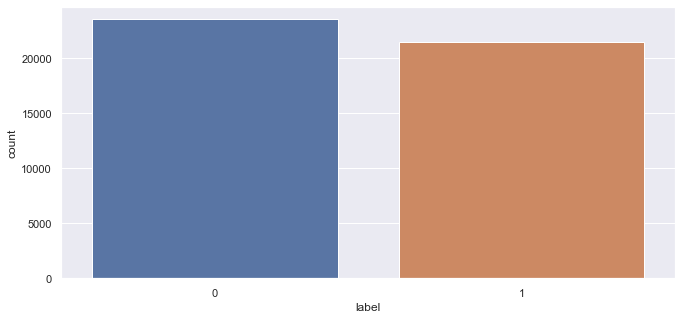

In [16]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(x= news.label)

print(news["label"].value_counts())

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

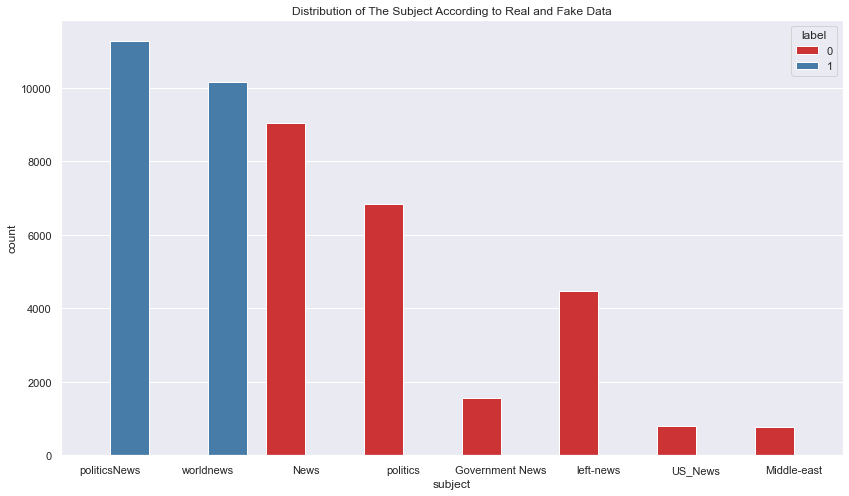

In [17]:
plt.figure(figsize=(14, 8))

sns.countplot(x="subject",  hue='label', data=news, palette="Set1")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [23]:
news_replica = news.copy()

In [24]:
news_replica['news_stream'] = news_replica['subject'] + " " + news_replica['title'] + " " + news_replica['text']
news_replica.drop(['title', 'text', 'subject','date','year','month'], axis=1, inplace=True)

In [25]:
news_replica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        44898 non-null  int64 
 1   news_stream  44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [27]:
news_replica.head(1)

label  \
0  1       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

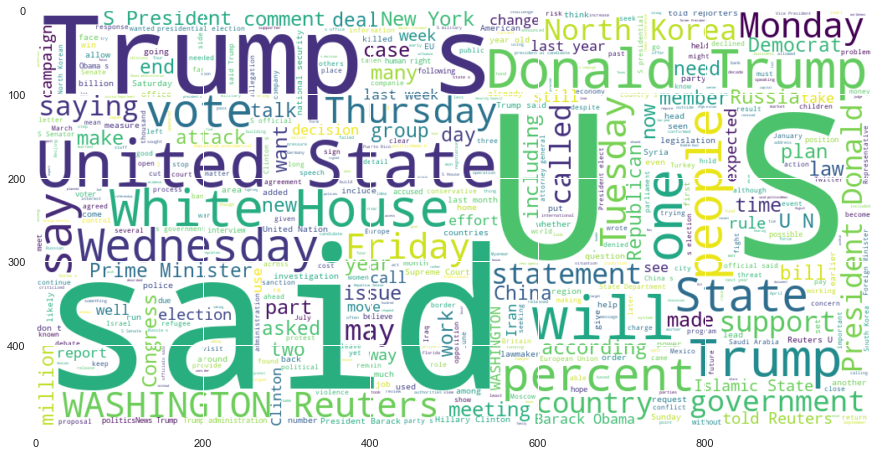

In [29]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 ,background_color = 'white', stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 1].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

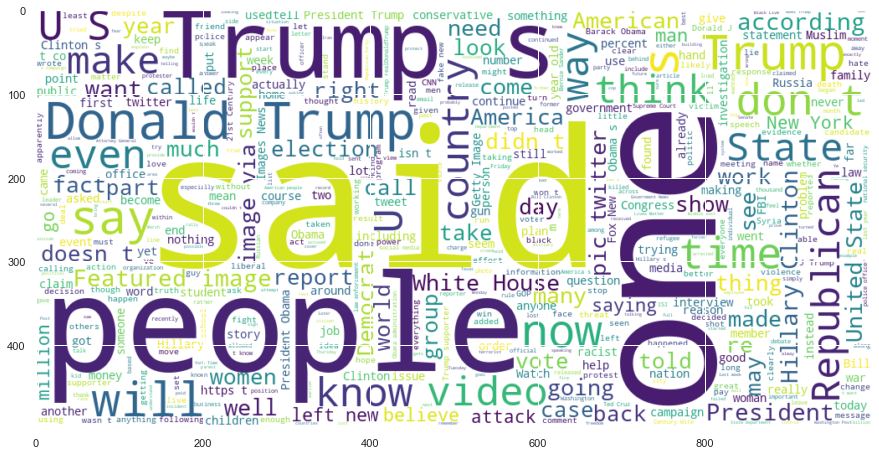

In [30]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500, background_color = 'white' , stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 0].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

In [14]:
lemma = nltk.WordNetLemmatizer()
corpus = []

for i in range(0, len(news_replica)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', news_replica['news_stream'][i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
print(len(corpus))
print(corpus[1])

44898
politicsnews u military accept transgender recruit monday pentagon washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb submit plan trump lawyer representing currently

In [16]:
labels = np.array(news_replica.label)

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [18]:
word_index = tokenizer.word_index
v_size = len(word_index)

In [19]:
max_len = 300
max_features = 10000
padding_type = 'pre'
embed_size = 100

sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen = max_len, padding = padding_type)

In [20]:

test_portion = 0.1
training_size = 30000

split = int(test_portion * training_size)

test_seq = padded[0:split]
train_seq = padded[split: training_size]
test_labels = labels[0:split]
train_labels = labels[split:training_size]

In [21]:
test_seq = np.array(test_seq)
train_seq = np.array(train_seq)

In [22]:
train_labels.shape

(27000,)

In [23]:
print(v_size)
print(word_index['news'])

107413
11


In [24]:

tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strata = tf.distribute.experimental.TPUStrategy(tpu)

In [25]:
BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
with tpu_strata.scope():
    model_lstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25)),
    
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model_lstm.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
    model_lstm.summary()

history_lstm = model_lstm.fit(train_seq, train_labels, batch_size = BATCH_SIZE, epochs = 20, validation_data = (test_seq, test_labels), verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          10741400  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 10,994,457
Trainable params: 253,057
Non-trainable params: 10,741,400
_________________________________________________________________
Epoch 1/20
211/211 - 29s - loss: 0.2207 - accuracy: 0.9166 - val_loss: 0.0102 - val_accuracy: 0.9983
Epo

<Figure size 432x288 with 0 Axes>

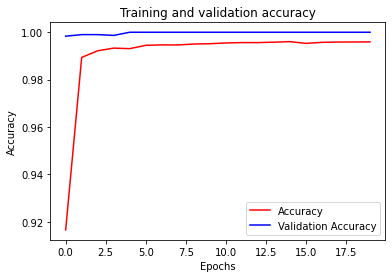

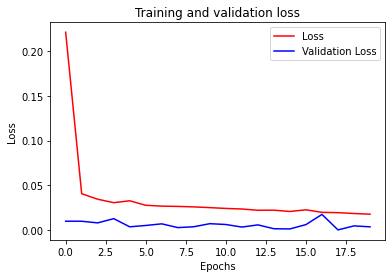

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.image  as mpimg

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_lstm.history['accuracy']
val_acc=history_lstm.history['val_accuracy']
loss=history_lstm.history['loss']
val_loss=history_lstm.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [28]:
print("Accuracy of the model on Training Data is - " , model_lstm.evaluate(train_seq, train_labels)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm.evaluate(test_seq, test_labels)[1]*100 , "%")

844/844 [==============================] - 8s 10ms/step - loss: 0.0147 - accuracy: 0.9964
Accuracy of the model on Training Data is -  99.64073896408081 %
94/94 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 1.0000
Accuracy of the model on Testing Data is -  100.0 %


In [ ]:
# BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
# with tpu_strata.scope():
#     model_lstm_optimal = tf.keras.Sequential([
#         tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25)),
    
#         tf.keras.layers.Dense(64, activation = 'relu'),
#         tf.keras.layers.Dense(32, activation = 'relu'),
#         tf.keras.layers.Dense(1, activation = 'sigmoid')
#     ])
    
#     lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#         lambda epoch: 1e-8 * 10** (epoch / 20))
#     optimizer = tf.keras.optimizers.SGD(lr = 1e-8, momentum = 0.9)
#     model_lstm_optimal.compile(optimizer=optimizer,loss = tf.keras.losses.Huber(), metrics = ['mae'], steps_per_execution=16)
#     model_lstm_optimal.summary()
    

# history_lstm_o = model_lstm_optimal.fit(train_seq, train_labels, batch_size = BATCH_SIZE, epochs = 100, verbose = 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus, labels,test_size = 0.60, random_state=0)

In [ ]:
y_test.shape

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
max_features = 10000
maxlen = 300
embed_size = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [ ]:
training_token = tokenizer.texts_to_sequences(X_train)
testing_token = tokenizer.texts_to_sequences(X_train)

In [ ]:
x_train = pad_sequences(training_token, maxlen = maxlen, padding = 'post')
x_test = pad_sequences(testing_token, maxlen = maxlen, padding = 'post')

In [ ]:
BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
with tpu_strata.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, embed_size, input_length = maxlen),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
        tf.keras.layers.MaxPooling1D(pool_size = 4),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
    model.summary()

history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = 10, validation_split= 0.4, verbose = 2)

In [ ]:
import matplotlib.image  as mpimg

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")